In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 


df = pd.read_csv("NetflixOriginals.csv", encoding='ISO-8859-1')

Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.

<AxesSubplot:xlabel='Runtime', ylabel='Language'>

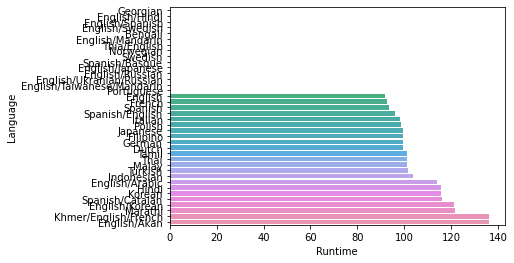

In [155]:
#df.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime")
#df.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime")[0:1]
a = df.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime").reset_index()
a.Runtime.mean()
sns.barplot(y=a["Language"], x=a.loc[(a["Runtime"] >= 91.62748731515471)]["Runtime"])



2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

In [154]:

doc=df[df.Genre=="Documentary"]
doc["Premiere"]=pd.to_datetime(doc.Premiere)
doc.index=doc["Premiere"]
doc



C:\Users\umutk\AppData\Local\Temp\ipykernel_12028\236483426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doc["Premiere"]=pd.to_datetime(doc.Premiere)


,Title,Genre,Premiere,Runtime,IMDB Score,Language,Year
Premiere,,,,,,,
2019-08-05,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,"August 5, 2019"
2021-04-22,Searching for Sheela,Documentary,2021-04-22,58,4.1,English,"April 22, 2021"
2019-12-19,After the Raid,Documentary,2019-12-19,25,4.3,Spanish,"December 19, 2019"
2019-09-13,"Hello Privilege. It's Me, Chelsea",Documentary,2019-09-13,64,4.4,English,"September 13, 2019"
2019-05-24,After Maria,Documentary,2019-05-24,37,4.6,English/Spanish,"May 24, 2019"
...,...,...,...,...,...,...,...
2017-11-24,Cuba and the Cameraman,Documentary,2017-11-24,114,8.3,English,"November 24, 2017"
2019-10-23,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English,"October 23, 2019"
2015-10-09,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,"October 9, 2015"


İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?



In [156]:
x = df[(df['Language']== 'English')]
long = x.sort_values(by='IMDB Score').head(1)
long

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Year
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,"January 19, 2018"


'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

In [157]:
run_hin = pd.DataFrame(df)
run_hin= run_hin[(run_hin['Language']== 'Hindi')]
run_hin['Runtime'].mean()

115.78787878787878

'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.


In [158]:
gen=pd.DataFrame({"Genre":df[["Genre","Language"]].groupby("Genre").count().index,"Count":df[["Genre","Language"]].groupby("Genre").count()["Language"].values})
gen.Genre.count()

115

Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.

In [35]:
#top = pd.DataFrame(df)
top = df['Language'].value_counts()
top.head(3)

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

IMDB puanı en yüksek olan ilk 10 film hangileridir?

In [159]:

up_sc = df.sort_values('IMDB Score')
up_sc.head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Year
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,"August 5, 2019"
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,"August 21, 2020"
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,"December 26, 2019"
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,"January 19, 2018"
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,"October 30, 2020"
5,Drive,Action,"November 1, 2019",147,3.5,Hindi,"November 1, 2019"
6,Leyla Everlasting,Comedy,"December 4, 2020",112,3.7,Turkish,"December 4, 2020"
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English,"June 5, 2020"
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English,"March 23, 2018"
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi,"May 18, 2021"


IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.

In [51]:
cor = df[["IMDB Score","Runtime"]]
print("ARALARINDA ÖNEMLİ DERECE İLİŞKİLENDİRME GÖZÜKMEMEKTEDİR \n{}".format(cor.corr()))

ARALARINDA İLİŞKİLENDİRME GÖZÜKMEMEKTEDİR 
            IMDB Score   Runtime
IMDB Score    1.000000 -0.040896
Runtime      -0.040896  1.000000


IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.

In [48]:
df[["IMDB Score","Genre"]].groupby("Genre").max().sort_values(by="IMDB Score",ascending=False).head(10)



,IMDB Score
Genre,
Documentary,9.0
One-man show,8.5
Concert Film,8.4
Animation/Christmas/Comedy/Adventure,8.2
Drama,7.9
Animation / Short,7.8
Crime drama,7.8
Musical / Short,7.7
Making-of,7.7


'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.

<AxesSubplot:xlabel='Runtime', ylabel='Title'>

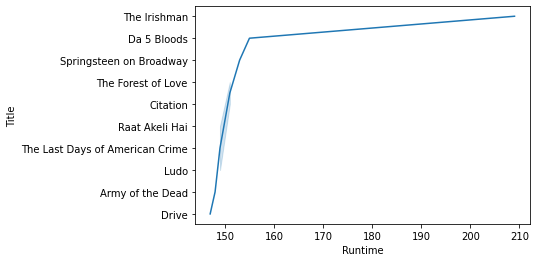

In [160]:
df.groupby("Title").agg({"Runtime": "max"}).sort_values(by="Runtime", ascending=False)[0:10]

up_run = df.groupby("Title").agg({"Runtime": "max"}).sort_values(by="Runtime", ascending=False)[0:10].reset_index()

sns.lineplot(y=up_run["Title"], x=up_run["Runtime"])


Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.

In [161]:

df['Premiere'].value_counts(sort=True)


October 2, 2020       6
November 1, 2019      5
October 18, 2019      5
November 2, 2018      4
June 19, 2020         4
                     ..
September 20, 2019    1
March 10, 2017        1
March 17, 2017        1
May 29, 2015          1
October 4, 2020       1
Name: Premiere, Length: 390, dtype: int64

Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.


In [162]:

print("ORTALAMA IMDB PUANI",df[["IMDB Score","Language"]].mean())
df[["IMDB Score","Language"]].groupby("Language").max().sort_values(by="IMDB Score",ascending=True).head(7)


ORTALAMA IMDB PUANI IMDB Score    6.271747
dtype: float64


C:\Users\umutk\AppData\Local\Temp\ipykernel_12028\3179034700.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("ORTALAMA IMDB PUANI",df[["IMDB Score","Language"]].mean())


,IMDB Score
Language,
Malay,4.2
Norwegian,5.1
Swedish,5.5
Filipino,5.5
Spanish/Basque,5.6
Thai,5.7
Polish,5.7


Hangi yılın toplam "runtime" süresi en fazladır?

In [92]:
df.groupby("Premiere").agg({"Runtime": "sum"}).sort_values(by="Runtime", ascending=False)[0:1]

,Runtime
Premiere,
"October 2, 2020",600


Her bir dilin en fazla kullanıldığı "Genre" nedir?

In [90]:



df.groupby(["Language"])["Genre"].value_counts(ascending=False)


Language      Genre          
Bengali       Documentary          1
Dutch         Crime drama          1
              Fantasy              1
              Romantic comedy      1
English       Documentary        120
                                ... 
Thai          Horror               1
Thia/English  Documentary          1
Turkish       Comedy               2
              Drama                2
              Romance              1
Name: Genre, Length: 204, dtype: int64

Veri setinde outlier veri var mıdır? Açıklayınız.

incelenecek 2 tür veri vardır 
1)runtime
2)imdb score

1)RUNTIME İÇİN OUTLIER VERİLER

count    584.000000
mean      93.577055
std       27.761683
min        4.000000
25%       86.000000
50%       97.000000
75%      108.000000
max      209.000000
Name: Runtime, dtype: float64
veriler incelendiğinde ort. 93.5 , std 27.7 ,  en küçük değerin 4 ve en büyük değerin 209 olduğu görülmüştür. grafiğe de bakıldığında aykırı değerlerin 0-50 arasında daha fazla yığıldığı görülmnektedir.


c:\Users\umutk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Runtime'>

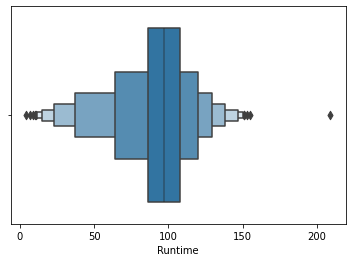

In [112]:
print(df.Runtime.describe())
print("veriler incelendiğinde ort. 93.5 , std 27.7 ,  en küçük değerin 4 ve en büyük değerin 209 olduğu görülmüştür. grafiğe de bakıldığında aykırı değerlerin(runtime) 0-50 arasında daha fazla yığıldığı görülmnektedir.")
sns.boxenplot(df["Runtime"])

2)IMDB SCORE İÇİN OUTLİER VERİLER

count    584.000000
mean       6.271747
std        0.979256
min        2.500000
25%        5.700000
50%        6.350000
75%        7.000000
max        9.000000
Name: IMDB Score, dtype: float64
veriler incelendiğinde ort. 6.2 , std 0.98 ,  en küçük değerin 2.5 ve en büyük değerin 9 olduğu görülmüştür.grafikte (ımdb score) 0-3. verilerin 8-9 verilerine göre daha fazla old. anlaşılmaktadır  


c:\Users\umutk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IMDB Score'>

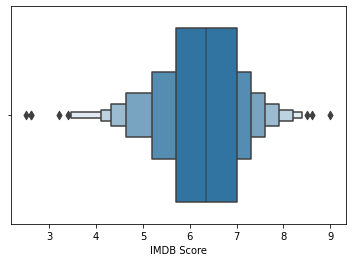

In [113]:

print(df["IMDB Score"].describe())
print("veriler incelendiğinde ort. 6.2 , std 0.98 ,  en küçük değerin 2.5 ve en büyük değerin 9 olduğu görülmüştür.grafikte (ımdb score) 0-3. verilerin 8-9 verilerine göre daha fazla old. anlaşılmaktadır  ")
sns.boxenplot(df["IMDB Score"])
